# ライブラリ

In [1]:
import os
import random
import sys

sys.path.append(
    "/Users/koroku/program/competition/signate/202402_samples/table/binary_classification"
)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.preprocessing.tools import convert_column_type
from src.preprocessing.encoder import ordinal_encoder
from src.preprocessing.missing_value import default_mv_processor
from src.training.lgbm_training import trainer

RAW_DATA_DIR = "../data/raw"

OBJECT_VARIABLE = "Survived"

CONVERSION_DICT = {"Pclass": str, "SibSp": str, "Parch": str}

/var/folders/0v/ww1kbtnn51s3wxx7f3p9wm2m0000gn/T/ipykernel_75276/3677581681.py:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# データの読み込み

In [2]:
df_train = pd.read_csv(
    os.path.join(RAW_DATA_DIR, "train.csv"), index_col=0
)
df_test = pd.read_csv(os.path.join(RAW_DATA_DIR, "test.csv"), index_col=0)
df_submit = pd.read_csv(
    os.path.join(RAW_DATA_DIR, "sample_submission.csv"),
    index_col=0,
    header=None,
)

# モデルの学習・予測

## データの準備

In [3]:
# データの型を変換する
df_train = convert_column_type(df_train, CONVERSION_DICT)
df_test = convert_column_type(df_test, CONVERSION_DICT)

# 欠損値処理
missing_cols_train = df_train.columns[df_train.isnull().any()].tolist()
missing_cols_test = df_test.columns[df_test.isnull().any()].tolist()
df_train = default_mv_processor(df_train, missing_cols_train)
df_test = default_mv_processor(df_test, missing_cols_test)

# 特徴量と正解ラベルに分割
y_train = df_train[OBJECT_VARIABLE]
X_train = df_train.drop([OBJECT_VARIABLE], axis=1)
X_test = df_test

# エンコーディング
cols = X_test.select_dtypes(include="object").columns.tolist()
X_train, X_test = ordinal_encoder(X_train, X_test, cols)

## 学習

In [4]:
params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "learning_rate": 0.01,
    "max_depth": 6,
    "feature_fraction": 0.30,
    "num_iterations": 1000,
    "seed": 42,
    "num_threads": 5,
    "verbose": -1,
}
models, f1 = trainer(X_train, y_train, params)

--------------------------
Fold 1
--------------------------
Training until validation scores don't improve for 50 rounds


/Users/koroku/program/competition/signate/202402_samples/table/binary_classification/.venv/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Did not meet early stopping. Best iteration is:
[996]	valid_0's binary_logloss: 0.379029
F1 Score (Training): 0.88632  (Validation): 0.74419
F1 Score (Training): 0.90302  (Validation): 0.79328
Valid Classification Report
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       110
           1       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179

--------------------------
Fold 2
--------------------------
Training until validation scores don't improve for 50 rounds


/Users/koroku/program/competition/signate/202402_samples/table/binary_classification/.venv/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[752]	valid_0's binary_logloss: 0.423726
F1 Score (Training): 0.89403  (Validation): 0.75385
F1 Score (Training): 0.90855  (Validation): 0.80120
Valid Classification Report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.75        68

    accuracy                           0.82       178
   macro avg       0.81      0.80      0.81       178
weighted avg       0.82      0.82      0.82       178

--------------------------
Fold 3
--------------------------
Training until validation scores don't improve for 50 rounds


/Users/koroku/program/competition/signate/202402_samples/table/binary_classification/.venv/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[582]	valid_0's binary_logloss: 0.488412
F1 Score (Training): 0.87814  (Validation): 0.67769
F1 Score (Training): 0.89601  (Validation): 0.74693
Valid Classification Report
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       110
           1       0.77      0.60      0.68        68

    accuracy                           0.78       178
   macro avg       0.78      0.75      0.76       178
weighted avg       0.78      0.78      0.77       178

--------------------------
Fold 4
--------------------------
Training until validation scores don't improve for 50 rounds


/Users/koroku/program/competition/signate/202402_samples/table/binary_classification/.venv/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[674]	valid_0's binary_logloss: 0.461995
F1 Score (Training): 0.88247  (Validation): 0.76119
F1 Score (Training): 0.89966  (Validation): 0.80682
Valid Classification Report
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.77      0.75      0.76        68

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178

--------------------------
Fold 5
--------------------------
Training until validation scores don't improve for 50 rounds


/Users/koroku/program/competition/signate/202402_samples/table/binary_classification/.venv/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[875]	valid_0's binary_logloss: 0.420876
F1 Score (Training): 0.89961  (Validation): 0.76033
F1 Score (Training): 0.91310  (Validation): 0.80581
Valid Classification Report
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       109
           1       0.88      0.67      0.76        69

    accuracy                           0.84       178
   macro avg       0.85      0.81      0.82       178
weighted avg       0.84      0.84      0.83       178

Average F1 Score (Training): 0.8881140270391285  (Validation): 0.7394485518268296
Average Balanced Accuracy (Training): 0.9040694709798347  (Validation): 0.7908075108057511


# 重要度

In [5]:
feature_importances = np.array([model.feature_importance(importance_type='gain') for model in models])
mean_importances = np.mean(feature_importances, axis=0)
feature_names = models[0].feature_name()

In [6]:
importances = zip(feature_names, mean_importances)
sorted_importances = sorted(importances, key=lambda x: x[1], reverse=True)
sorted_importances

[('Sex', 8631.664451956749),
 ('Fare', 4012.575377363656),
 ('Age', 3190.729362743751),
 ('Ticket', 3059.285456160006),
 ('Name', 2650.3511521250684),
 ('Pclass', 2519.9786407534825),
 ('Cabin', 1681.2888722147604),
 ('Embarked', 823.8900769542126),
 ('SibSp', 796.7220601566494),
 ('Parch', 570.4582252789985)]

In [7]:
sorted_features = [feature[0] for feature in sorted_importances]
sorted_importances = [importance[1] for importance in sorted_importances]

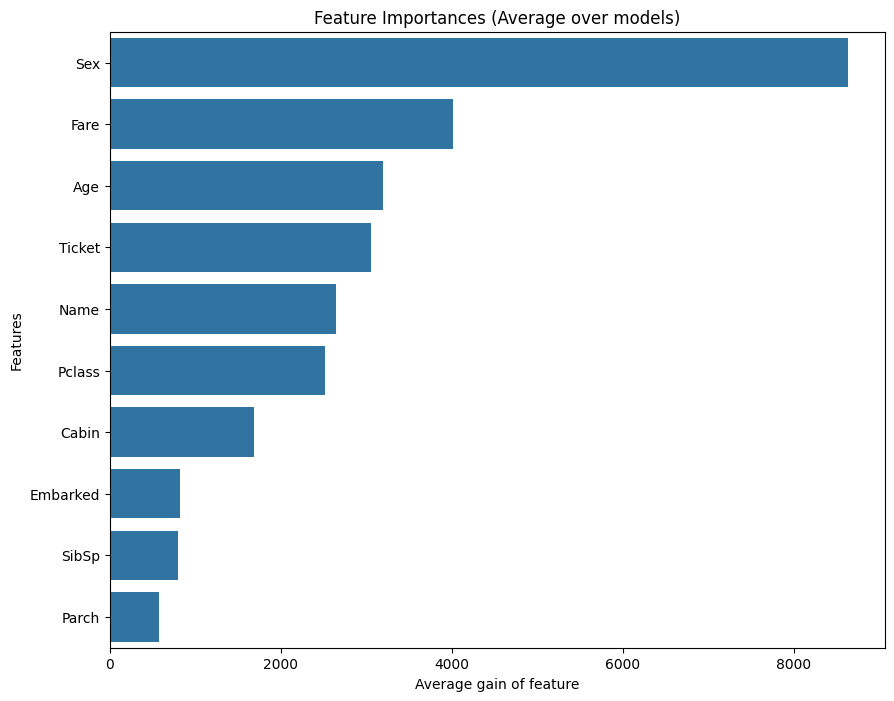

In [8]:
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_importances, y=sorted_features)
plt.title('Feature Importances (Average over models)')
plt.xlabel('Average gain of feature')
plt.ylabel('Features')
plt.show()

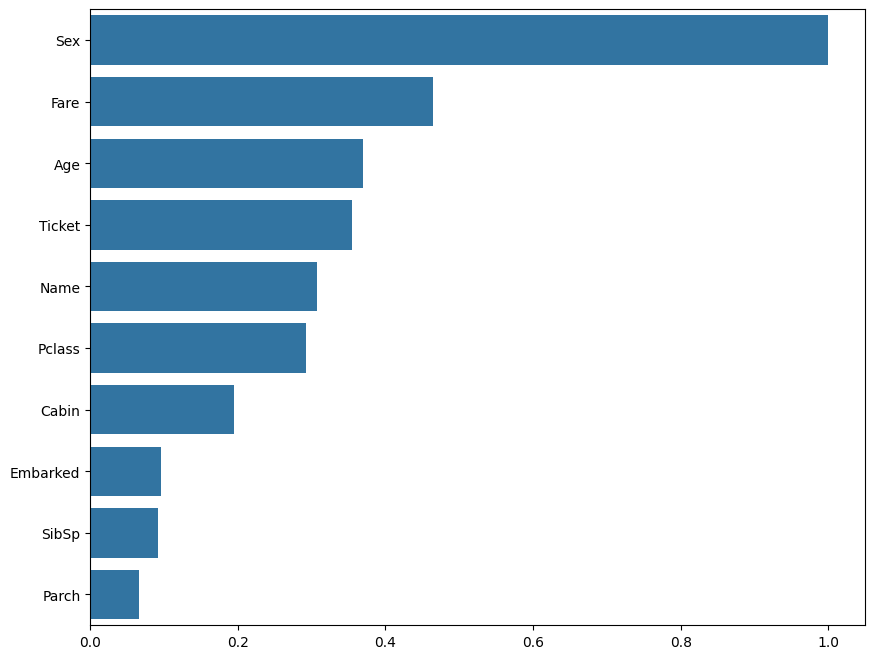

In [9]:
max_importance = max(sorted_importances)
importance_ratios = [x / max_importance for x in sorted_importances]
plt.figure(figsize=(10, 8))
sns.barplot(x=importance_ratios, y=sorted_features)
plt.show()

In [10]:
important_features = [name  for name, ratio in zip(sorted_features, importance_ratios) if ratio>0.1]
important_features

['Sex', 'Fare', 'Age', 'Ticket', 'Name', 'Pclass', 'Cabin']

In [11]:
important_features = [name  for name, ratio in zip(sorted_features, importance_ratios) if ratio>0.2]
important_features

['Sex', 'Fare', 'Age', 'Ticket', 'Name', 'Pclass']